#**Evaluation**


*   load custom images and classify wearing a mask or not
*   show the test images and prediction or/and scores

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import os
from torchvision import transforms, datasets
from google.colab.patches import cv2_imshow
import cv2
import torchvision.models as models
from torchvision.transforms.functional import to_pil_image
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
transforms =  transforms.Compose([
                                  transforms.ToTensor(),
                      
          ])

In [ ]:
# 1. prepare data

image_path = "% your data path "
# ImageFolder and data_loader code below


In [ ]:
from google.colab import files
uploaded = files.upload()

1-1, 1-2, 1-3 중 하나만 실행하면 됩니다.(1-3 권장)

In [3]:
# load model and change the # of classes
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch.nn as nn

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.resnet_50 = models.resnet50(pretrained = True, progress = True)

    for layers in self.resnet_50.parameters():
      layers.requires_grad = False

    self.num_of_classes = 2 # binary classification

    num_ftrs = self.resnet_50.fc.in_features

    self.resnet_50.fc = nn.Sequential(
        nn.Linear(2048, 1000),
        nn.ReLU(inplace=True),
        nn.Linear(1000, 256),
        nn.ReLU(inplace=True),
        nn.Linear(256, 64),
        nn.ReLU(inplace=True),
        nn.Linear(64, 1),
        nn.Sigmoid()
    )

    self.resnet_50.fc.requires_grad = True
  
  def forward(self, x):
    output = self.resnet_50(x)

    return output

In [4]:
cd '/content/drive/My Drive/IC_PBL_Project_2019009261_GAONCHOI'

/content/drive/My Drive/IC_PBL_Project_2019009261_GAONCHOI


1-1. path를 통해 모델 파일 불러오기

필요한 경우에 한해 경로를 적절히 변경하여 설정하여야 합니다.

In [5]:
# 2. load model
model_weight_path = '/content/drive/MyDrive/IC_PBL_Project_2019009261_GAONCHOI/model_mask_detection.pth'
# model load below and assign device
model = Model().to(device)
model.load_state_dict(torch.load(model_weight_path))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

<All keys matched successfully>

1-2. google drive로부터 모델 파일 불러오기

In [ ]:
!gdown --id 1-2X_QL-dMx7Ti-htHbyhL7W-7XqUv8p2

.pth 형식 파일을 아래에 업로드합니다. 오래 걸립니다...

In [1]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
model = Model()
model.load_state_dict(torch.load(uploaded))
model.to(device)

NameError: ignored

In [ ]:
# 3. perform evaluation

Saving face_image_1.jpg to face_image_1 (1).jpg


Text(0.5, 0, 'p=0.9427 -> masked')

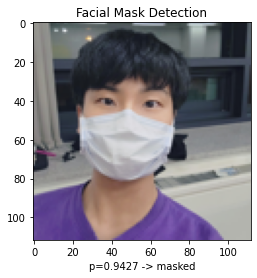

In [7]:
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import io

# if .eval() is not used
# the model will output bad value,,,,
model.eval()

def result(tensor_):
  if tensor_.item() >= 0.5:
    return "masked"
  else:
    return "non-masked"

img_source = files.upload()
img_source = list(img_source.values())[0]
img = Image.open(io.BytesIO(img_source))

img_resize = img.resize((112, 112))

convert_tensor = transforms.ToTensor()
faces = convert_tensor(img_resize).float()
faces = torch.Tensor(faces).to(device)
faces = faces.unsqueeze(0)
faces_output = model(faces)
str1 = 'p={p} -> {result}'.format(p=round(faces_output.item(), 4), result=result(faces_output))

plt.title("Facial Mask Detection")
plt.imshow(img_resize)
plt.xlabel(str1)